In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')

## Reading the data

In [60]:
df = pd.read_csv('../proje/data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [61]:
df.shape

(51717, 17)

In [62]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Cleaning

### 1)Removing unncessary columns

- url has name of restaurant and location. We also have a name column and location columns. so we can drop url
- review list has rating and customers reviews. we have a separate column for restaurant rating so we can drop review list column
- phone number column is also redundant for our project
- dishes liked is also not necessary for our predictions. we will base our predictions mainly on cusines, locatrion,rating.
- DECISION PENDING listed_in(city) has different locations. since we already have locations, listed_in(city) is redundant

In [64]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### 2)changing columns names

In [65]:
df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### 3) removing duplicates

In [66]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

## 4) Removing null values

In [67]:
df.dropna(inplace = True)

## 5)exploring rate column

In [68]:
df['rate'].unique()
# if rating is NEW or - we assume its a new 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- if rating is new or - we replcae it with null
- remove '/5' and converting to float

In [69]:
def update_ratings(rating):
    if(rating=='NEW' or rating=='-'):
        return np.nan
    else:
        rating = str(rating).split('/')[0]
        return float(rating)
    
df['rate'] = df['rate'].apply(update_ratings)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43447 non-null  object 
 1   online_order  43447 non-null  object 
 2   book_table    43447 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         43447 non-null  int64  
 5   location      43447 non-null  object 
 6   rest_type     43447 non-null  object 
 7   cuisines      43447 non-null  object 
 8   cost          43447 non-null  object 
 9   type          43447 non-null  object 
 10  city          43447 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


## 6)changing cost column to float data type

- cost is of object data type. We convert it to float, by removing commas

In [71]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [72]:
# replce comma with empty string in cost column
df["cost"]=df["cost"].astype(str).apply(lambda x: x.replace(",","")).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43447 non-null  object 
 1   online_order  43447 non-null  object 
 2   book_table    43447 non-null  object 
 3   rate          41190 non-null  float64
 4   votes         43447 non-null  int64  
 5   location      43447 non-null  object 
 6   rest_type     43447 non-null  object 
 7   cuisines      43447 non-null  object 
 8   cost          43447 non-null  float64
 9   type          43447 non-null  object 
 10  city          43447 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.0+ MB


## 7) checking on location column

In [73]:
location_counts=df['location'].value_counts()


##### If a particular location has less than 100 restaurant, we will change he location to 'others'

In [74]:
def update_location(location):
    if location_counts[location]<300:
        return "others"
    else:
        return str(location)
    
df['location'] = df['location'].apply(update_location)
    

## 8) checking restaurant type (rest_type)

In [75]:
rest_type_counts=df['rest_type'].value_counts()


##### If there are less than 100 restaurants of a particular type we will put that restaurant's rest_type as 'others'

In [76]:
def update_rest_type(rest_type):
    if rest_type_counts[rest_type]<100:
        return "others"
    else:
        return str(rest_type)
    
df['rest_type'] = df['rest_type'].apply(update_rest_type)

## 9) Checking cuisines columns

In [77]:
cuisines_count=df['cuisines'].value_counts()
print(cuisines_count)

cuisines
North Indian                                                           2241
North Indian, Chinese                                                  2029
South Indian                                                           1317
Bakery, Desserts                                                        642
Biryani                                                                 632
                                                                       ... 
Chinese, Bakery                                                           1
South Indian, Fast Food, Chinese                                          1
Asian, Continental, Healthy Food                                          1
South Indian, North Indian, Chinese, Desserts, Fast Food, Ice Cream       1
North Indian, Chinese, Arabian, Momos                                     1
Name: count, Length: 2487, dtype: int64


##### if a particular cuisine type has less than 100 restaurant, then we change the cuisine type as others

In [78]:
def update_cuisines(cuisine):
    if cuisines_count[cuisine]<100:
        return "others"
    
    else:
        return str(cuisine)
    
df['cuisines']=df['cuisines'].apply(update_cuisines)

# EDA

In [79]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


## 1)Count plot of various locations

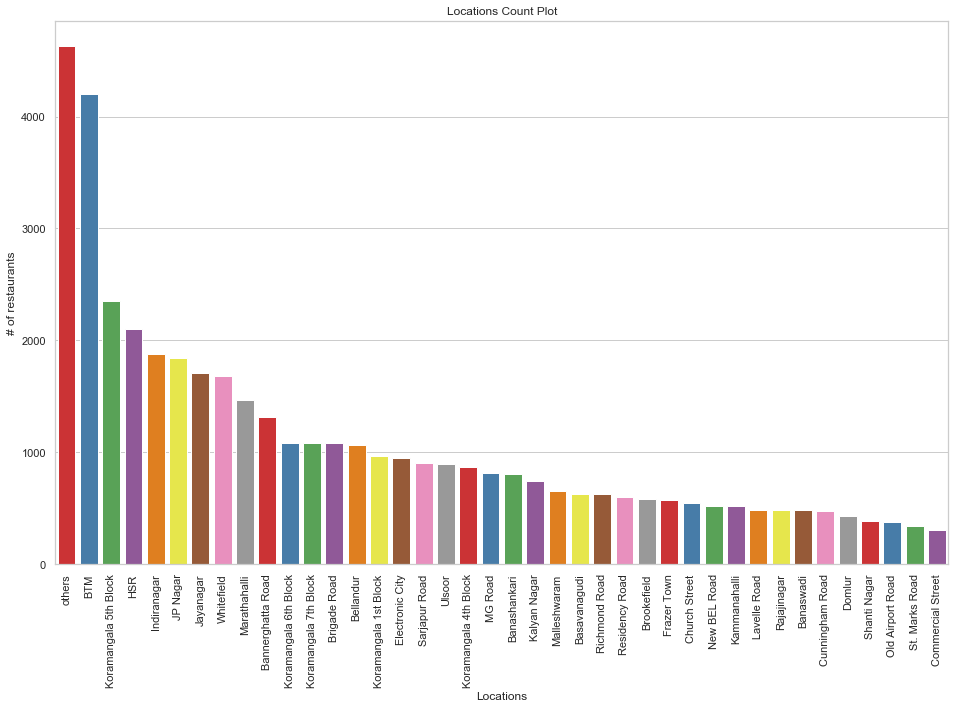

In [80]:
# Create a count plot
plt.figure(figsize = (16,10))
# plt.style.use('dark_background')
sns.countplot(x=df['location'], palette="Set1",order=df['location'].value_counts().index)

# Set labels and title

plt.xlabel("Locations")
plt.ylabel("# of restaurants")
plt.title("Locations Count Plot")
plt.xticks(rotation=90)

# Show the plot

plt.show()

## 2)count plot of cuisine type

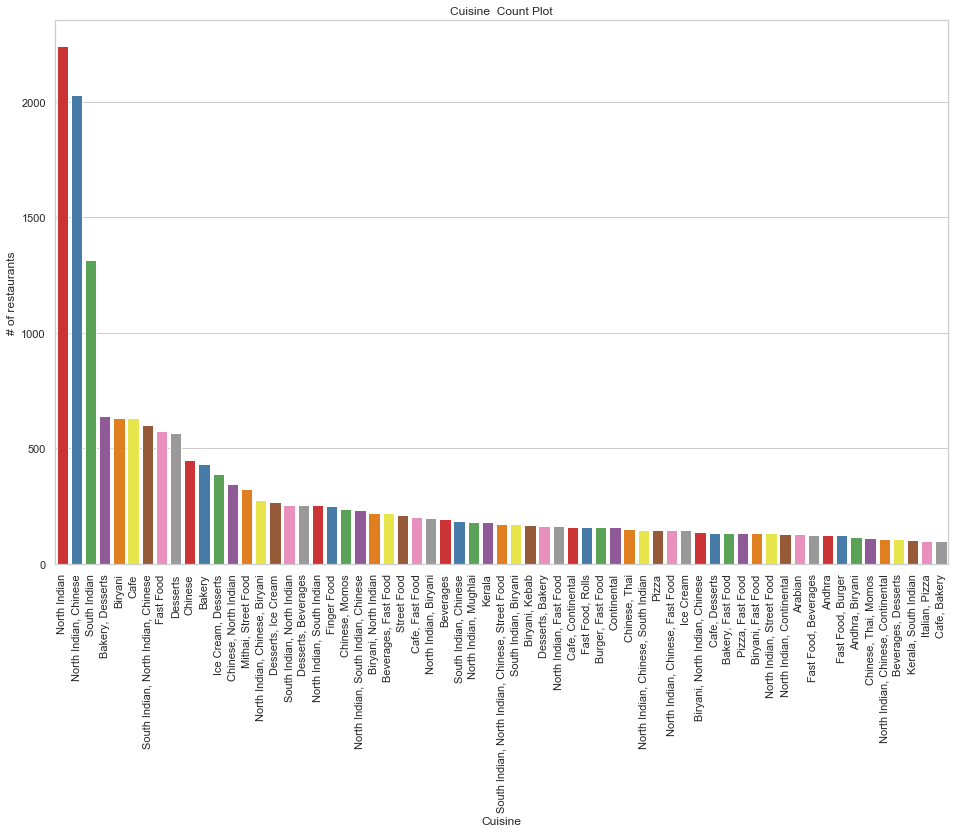

In [81]:
# Exclude a cuisines category others 
cuisines_data=df['cuisines']
filtered_cuisines_data = cuisines_data[cuisines_data != "others"]


# Create a count plot
plt.figure(figsize = (16,10))
sns.countplot(x=filtered_cuisines_data, palette="Set1",order=filtered_cuisines_data.value_counts().index)

# Set labels and title
plt.xlabel("Cuisine")
plt.ylabel("# of restaurants")
plt.title("Cuisine  Count Plot")
plt.xticks(rotation=90)

# # Show the plot
# plt.style.use('dark_background')
plt.show()

## 3) Count plot of online_order

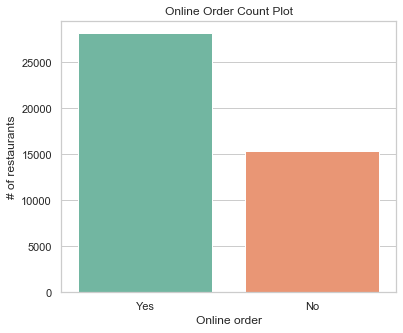

In [82]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(x=df['online_order'], palette="Set2")

# Set labels and title
plt.xlabel("Online order")
plt.ylabel("# of restaurants")
plt.title("Online Order Count Plot")

# Show the plot
plt.style.use('dark_background')
plt.show()

## 4) Count plot of book_table

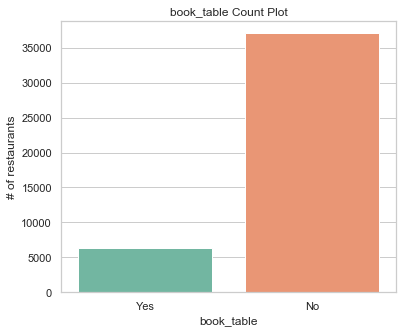

In [85]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(x=df['book_table'], palette="Set2")

# Set labels and title
plt.xlabel("book_table")
plt.ylabel("# of restaurants")
plt.title("book_table Count Plot")

# Show the plot
plt.show()

## 5) count plot of type

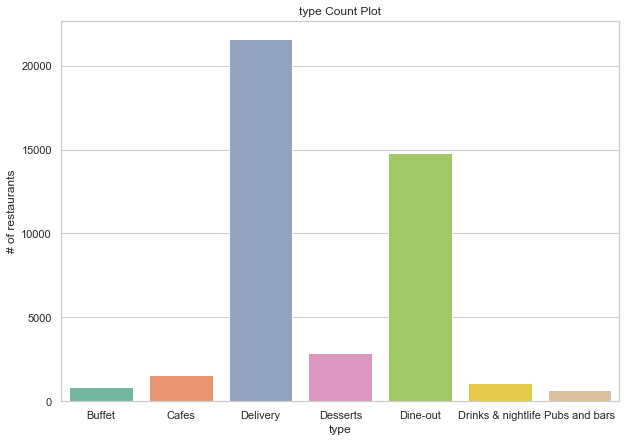

In [104]:
# Create a count plot
plt.figure(figsize = (10,7))
sns.countplot(x=df['type'], palette="Set2")

# Set labels and title
plt.xlabel("type")
plt.ylabel("# of restaurants")
plt.title("type Count Plot")


# Show the plot
plt.show()

## 6)Rate vs online order

Text(0.5, 1.0, 'rate vs online order Plot')

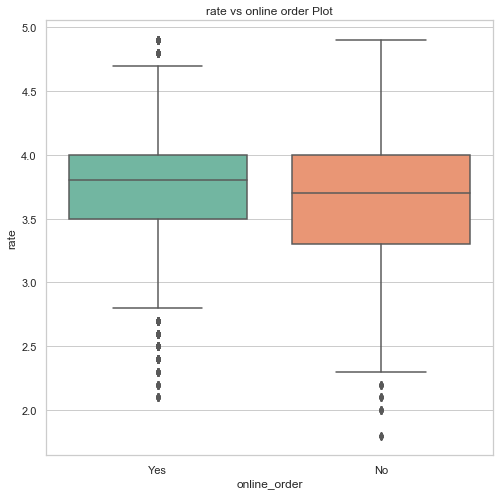

In [97]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = df['online_order'], y = df['rate'],palette="Set2")

# medians = df.groupby('online_order')['rate'].mean()
# print(medians)
# for xtick, median in enumerate(medians):
#     plt.text(xtick, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')


plt.title("rate vs online order Plot")

## 7)Rate vs book_table

Text(0.5, 1.0, 'rate vs book_table Plot')

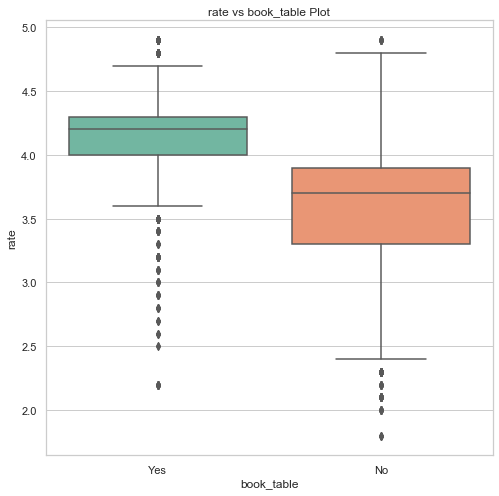

In [100]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = df['book_table'], y = df['rate'],palette="Set2")

# medians = df.groupby('book_table')['rate'].mean()
# print(medians)
# for xtick, median in enumerate(medians):
#     plt.text(xtick, median, f'Median: {median:.2f}', horizontalalignment='center', color='black', weight='semibold')

plt.title("rate vs book_table Plot")

## Visualizing Online Order Facility, Location Wise

online_order             No   Yes
location                         
BTM                    1176  3025
Banashankari            308   495
Banaswadi               184   298
Bannerghatta Road       442   870
Basavanagudi            207   421
Bellandur               350   712
Brigade Road            465   614
Brookefield             178   401
Church Street           213   334
Commercial Street       173   136
Cunningham Road         156   318
Domlur                  199   227
Electronic City         420   533
Frazer Town             204   367
HSR                     369  1731
Indiranagar             579  1303
JP Nagar                634  1207
Jayanagar               423  1286
Kalyan Nagar            273   469
Kammanahalli            172   344
Koramangala 1st Block   196   767
Koramangala 4th Block   375   489
Koramangala 5th Block   806  1550
Koramangala 6th Block   425   661
Koramangala 7th Block   322   760
Lavelle Road            288   200
MG Road                 451   366
Malleshwaram  

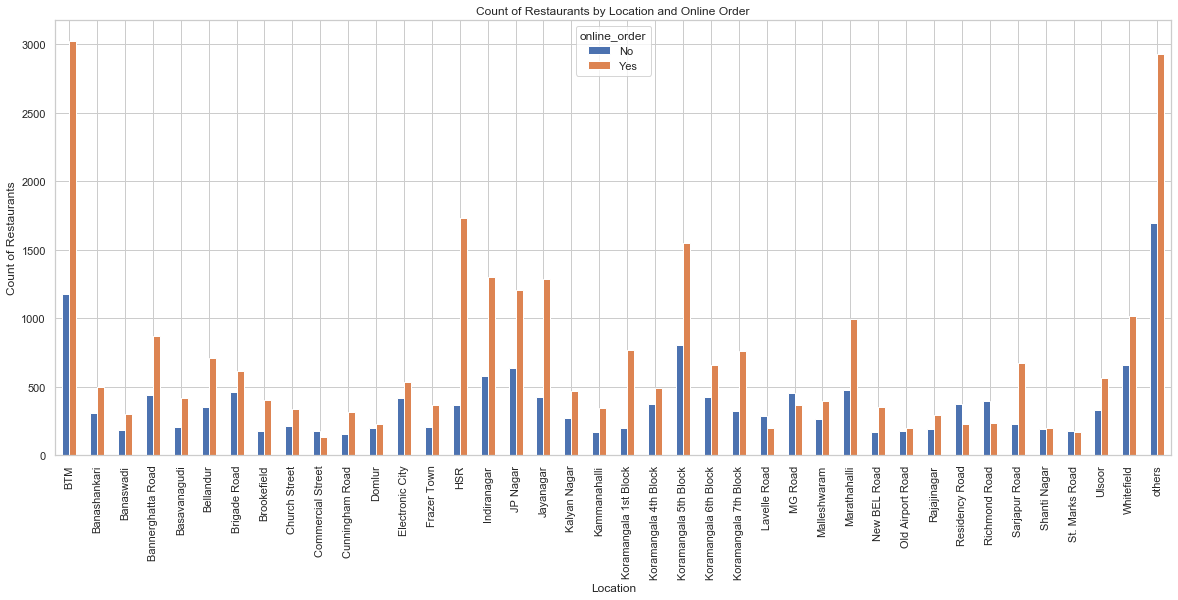

In [107]:
# Create a pivot table
df1 = df.pivot_table(index='location', columns='online_order', values='name', aggfunc='count', fill_value=0)

# Plot the bar chart
df1.plot(kind='bar', figsize=(20, 8))
plt.title("Count of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Count of Restaurants")
plt.show()

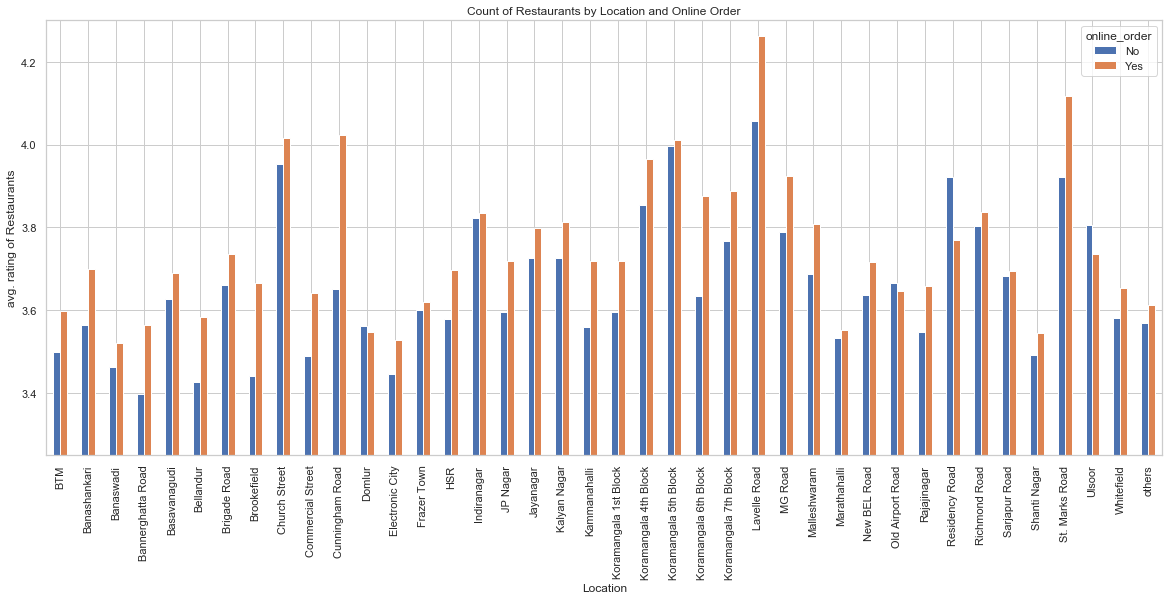

In [119]:
# Create a pivot table
df1 = df.pivot_table(index='location', columns='online_order', values='rate', aggfunc='mean', fill_value=0)
# print(df1)

# Plot the bar chart
ax=df1.plot(kind='bar', figsize=(20, 8))
plt.title("average rating of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("avg. rating of Restaurants")
ax.set_ylim(3.25, 4.3)
plt.show()

location      online_order
BTM           No              3.498720
              Yes             3.597445
Banashankari  No              3.563736
              Yes             3.699788
Banaswadi     No              3.463158
                                ...   
Ulsoor        Yes             3.734918
Whitefield    No              3.580556
              Yes             3.653033
others        No              3.568694
              Yes             3.612981
Name: rate, Length: 80, dtype: float64
